<a href="https://colab.research.google.com/github/JaredAllanigue/Jared/blob/master/Jared_mla_analysis_RUN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #https://medium.com/@ashwindesilva/how-to-use-google-colaboratory-to-clone-a-github-repository-e07cf8d3d22b
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls
%cd gdrive/My Drive/Colab Notebooks

gdrive	sample_data
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
!git clone https://github.com/thejevans/mla.git
!git pull

fatal: destination path 'mla' already exists and is not an empty directory.
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [ ]:
!apt-get update
import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy.lib.recfunctions as rf
import time

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://

In [ ]:
import os
import sys
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install ./mla
import mla

Processing ./mla
  Created wheel for mla-thejevans: filename=mla_thejevans-0.0.1-cp37-none-any.whl size=28965 sha256=5c602714ecca9985d1e87cf911149768af635192be7e59326696798140977492
  Stored in directory: /tmp/pip-ephem-wheel-cache-6hdfn4zr/wheels/48/f2/be/65c47eacad45df29bced6b9de424c771a45ef8993e1e928337
Successfully built mla-thejevans


['./Datasets/icecube_10year_ps/events/IC86_III_exp.csv', './Datasets/icecube_10year_ps/events/IC86_II_exp.csv', './Datasets/icecube_10year_ps/events/IC86_VI_exp.csv', './Datasets/icecube_10year_ps/events/IC86_I_exp.csv', './Datasets/icecube_10year_ps/events/IC86_IV_exp.csv', './Datasets/icecube_10year_ps/events/IC86_V_exp.csv', './Datasets/icecube_10year_ps/events/IC86_VII_exp.csv']
Keys available in data:
('time', 'logE', 'angErr', 'ra', 'dec', 'azi', 'zen')
Data NEvents: 897406
[(55694.99190986, 4.55, 0.00349066, 4.2346051 , -0.3948982 , 1.32062083, 1.17533962)
 (55694.99825262, 2.96, 0.01570796, 4.80188946,  0.68259827, 0.79477058, 2.25346441)
 (55695.00023207, 2.87, 0.00837758, 1.61364416,  0.08201302, 3.99456997, 1.65272208)
 ...
 (58307.96355617, 2.88, 0.00523599, 5.37783066,  0.74251542, 0.96755818, 2.31441131)
 (58307.96397167, 2.98, 0.00366519, 5.79796632,  0.78051124, 0.54958673, 2.35289582)
 (58307.97260325, 3.28, 0.00436332, 3.72294437,  0.0821701 , 2.6782601 , 1.65141308)]

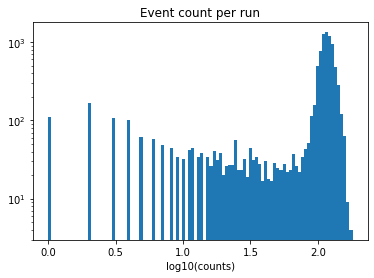

In [ ]:
import glob
def read_npy(filelist):
    data = []
    for f in sorted(filelist):
        x = np.load(f)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data

def read_csv(filelist):
    np_dtype = np.float64
    my_names = ['time', 'logE', 'angErr', 'ra', 'dec', 'azi', 'zen']
    convert = lambda x: np.radians(float(x))
    data = []
    for f in sorted(filelist):
        x = np.genfromtxt(f, names=my_names, dtype=np_dtype, skip_header = 1,
                        converters={2: convert, 3: convert, 4: convert, 5: convert, 6: convert})
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data[np.argsort(data['time'])]

def read_uptime_csv(filelist):
    np_dtype = np.float64
    my_names = ['start', 'stop']
    data = []
    for f in sorted(filelist):
        x = np.genfromtxt(f, names=my_names, dtype=np_dtype, skip_header = 1)
        if len(data) == 0: data = x.copy()
        else: data = np.concatenate([data, x])
    return data[np.argsort(data['start'])]

def read_mc(file, n_keep = 50000):
    sim = np.load(file)
    # Reduce the number of events in the simulation
    # to a manageable level.
    N = len(sim)
    sim = np.random.choice(sim, n_keep)    # cut down to n_keep events
    sim['ow'] /= float(n_keep)/float(N)    # correct the weights
    print("Reduced the number of simulation events from ",
         "{} to {}".format(N, len(sim)))
    # Show the possible keys available here:
    print("Keys available in simulation:")
    print(sorted(sim.dtype.names))
    print()
    return sim

# Fix the 7yr data release good run lists, add livetime, events per run, and a psudeo-run number
def fix_grl(data,raw_grl):
    grl_run_index, counts = np.unique(np.searchsorted(raw_grl['start'], data['time']), return_counts=True)
    pad_counts = np.zeros(len(raw_grl),dtype=int)
    for idx,thiscnt in zip(grl_run_index,counts):
        #print(idx,thiscnt)
        pad_counts[idx-1] = int(thiscnt)
    #print(pad_counts)
    plt.hist(np.log10(counts),100,log=True)
    plt.xlabel('log10(counts)')
    plt.title('Event count per run')

    livetime = raw_grl['stop'] - raw_grl['start']
    run_number = range(len(raw_grl))
    new_grl = rf.append_fields(raw_grl, ['events','livetime','run'], [pad_counts,livetime,run_number])
    return new_grl

#1 year data file from npy file
DATA_PATH = "./Datasets/old_npy_data"#"/home/jovyan/pointsource_tutorial/data2" #Look up how to path on Colab, https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/
data_file_1 = DATA_PATH + "/IC86_*_exp.npy"
#data = read_npy(glob.glob(data_file_1))

# 7 year data from CSV files
DATA2_PATH = "./Datasets/icecube_10year_ps" #"/home/jovyan/pointsource_tutorial/data_7yr" #*
data_files = DATA2_PATH + "/events/IC86_*_exp.csv"
print(glob.glob(data_files))
data = read_csv(glob.glob(data_files))

print("Keys available in data:")
print(data.dtype.names)
print('Data NEvents:',len(data))
print(data)
print()

# Read in the MC files - these are the same regardless of data files 
sim_files = DATA_PATH + "/IC86_2012_MC.npy"
sim = read_mc(sim_files, n_keep=250000)
print('Sim NEvents:',len(sim))
print(sim.dtype.names)
print()

# Read in the GRL file
# 1 year data
#grl = np.load(DATA_PATH + "/IC86_2012_GRL.npy")
# 7 yr data
grl_files = DATA2_PATH + "/uptime/IC86_*_exp.csv"
raw_grl = read_uptime_csv(glob.glob(grl_files))
grl = fix_grl(data=data,raw_grl=raw_grl)
print("Keys available in GRL:")
print(grl.dtype.names)
print(grl)

In [ ]:
#PSO J0309+27
#RA 03h 09m 47.49s
#DEC+27° 17′ 57.31″
#Calculate in degreess
ra_pso = (3+(9+(47.49/60.0))/60.0)*(360.0/24.0)
dec_pso = 27.0 +(17+(57.31/60.0))/60.0

source2 = mla.sources.Source(
    name="PSO J0309",
    ra=np.deg2rad(ra_pso),
    dec=np.deg2rad(dec_pso)
)

source = mla.sources.Source(
    name="TXS",
    ra=np.deg2rad(77.3583),
    dec=np.deg2rad(5.6931)
)

In [ ]:
# TXS analysis for 158 days at known published neutrino flare time
#start = 56224
#length = 158

# Use all the data.  Use the GRL info
start = grl['start'][0]
length = grl[len(grl)-1][1] - start

print('Time window of: ', length, ' starting at MJD:', start)


background_time_profile = mla.time_profiles.UniformProfile(start, length)
signal_time_profile = mla.time_profiles.UniformProfile(start, length)

model = mla.models.I3EventModel(
    source=source,
    data=data,
    sim=sim,
    grl=grl,
    gamma=-2,
    background_time_profile=background_time_profile,
    signal_time_profile=signal_time_profile,
    sampling_width=np.radians(5),
    withinwindow=True,
)

Time window of:  2614.0918749999983  starting at MJD: 55694.99047453


In [ ]:
bg_fit_time_pro = copy.deepcopy(background_time_profile)
sig_fit_time_pro = copy.deepcopy(signal_time_profile)
        
ts = mla.test_statistics.LLHTestStatistic([
    mla.test_statistics.SpatialTerm(),
    mla.test_statistics.TimeTerm(
        bg_fit_time_pro,
        sig_fit_time_pro,
    ),
    mla.test_statistics.I3EnergyTerm(gamma=-2),
])

In [ ]:
analysis = mla.analysis.Analysis(
    model=model,
    test_statistic=ts,
    source=source,
)

897447
[(57470.64125851432, 3.17, 0.005061454830783556, 2.6312941591894106, 0.4801226239311201, 1.493408427761468, 2.0506396980456976, 0.46188793887372415)
 (56394.61630913713, 4.24, 0.016231562043547264, 1.7752522002782567, -0.5845282197854209, 1.2202643998243554, 0.9860935740842763, -0.5518059920247202)
 (57162.20631296248, 3.05, 0.02757620218151041, 6.168194405749838, 0.28483773392547457, 1.0955780780618805, 1.8565416319314083, 0.281001727065251)
 ...
 (56480.57312445703, 4.996935889343277, 0.00294998078416457, 1.347484562459104, 0.09617219917203539, 4.8046032908594976, 1.6134105717278162, 0.09602401679829921)
 (55894.21874381766, 3.956342381893846, 0.007731271820804506, 1.3521973387129846, 0.09303329364361655, 0.2536350209038605, 1.7266406333391189, 0.09289914817961537)
 (58204.86576067241, 2.9735691290824575, 0.007935525606157857, 1.3433110730236564, 0.0998438940125645, 1.9328908110999348, 1.6023452810303715, 0.09967808932331162)]
('time', 'logE', 'angErr', 'ra', 'dec', 'azi', 'ze

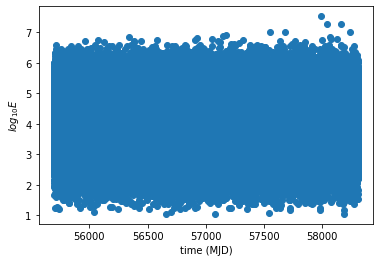

('time', 'logE', 'angErr', 'ra', 'dec', 'azi', 'zen')
('time', 'logE', 'angErr', 'ra', 'dec', 'azi', 'zen', 'sindec')
[(15.13374261, 12.12679719)]
15.133742608906445 12.126797188015718


In [ ]:
trial = mla.analysis.produce_trial(
    analysis,
    #n_signal_observed=20,
    flux_norm=1e-11
)
print(len(trial))
print(trial)
print(trial.dtype.names)
# Plot the trial events
plt.scatter(trial['time'], trial['logE'])
plt.xlabel('time (MJD)')
plt.ylabel(r'$log_{10}E$')
plt.show()

# Generate parameter array for minimizing
## Here: minimize both spectral index (gamma) and n_s
#test_params = mla.generate_params(
#            gamma=-2,
#            ns=90,
#        )
#bounds = [(-4, -1), (0, 150)]

## Here: just miminize n_s
test_params = mla.generate_params(
            ns=90
)
bounds = [(0, 150)]

#result = mla.analysis.minimize_ts(
#    analysis=analysis,
#    events=trial,
#    bounds=bounds,
#    test_params=test_params,
#    as_array=True,

print(data.dtype.names)
sin_dec = np.sin(data['dec'])
new_data = rf.append_fields(data, 'sindec', sin_dec)
print(new_data.dtype.names)
txs_res = mla.analysis.minimize_ts(
    analysis=analysis,
    events=new_data,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)    


print(txs_res)
txs_ts = txs_res[0][0]
txs_ns = txs_res[0][1]
print(txs_ts,txs_ns)
# result = TS , # interesting events

In [ ]:
results = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=10,
    #n_signal_observed=50,
    flux_norm=1e-11,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

for result in results:
    print(result)
    
(ts,ns) = zip(*results)
print(np.mean(ts),np.mean(ns))

(2.69417152, 5.12649963)
(0.65679052, 1.79488176)
(3.67815442, 4.80708944)
(20.08606872, 8.125217)
(11.458756, 11.4104307)
(0., 0.)
(12.6677344, 7.93174479)
(12.09625968, 3.77530442)
(10.09686435, 7.20022126)
(11.95712927, 11.63320839)
8.539192889258622 6.180459739101383


In [ ]:
#Produce and minimize trials, then plot the ts distribution

# :)

#Get a timestamp before running to use later
t_initial = time.time()

exponent1=-11.1
exponent2=-10.9
exponent3=-10.8
exponent4=-10.7
exponent5=-10.6
exponent6=-10.5


#Producing trials at different flux levels

print("Producing 1000 trials, flux normalization = 10^-11.1")
best_fit_arr_111 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=10**exponent1,
    #n_signal_observed=50,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

print("Producing 1000 trials, flux normalization = 10^-11")
best_fit_arr_11 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=1e-11,
    #n_signal_observed=50,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

print("Producing 1000 trials, flux normalization = 10^-10.9")
best_fit_arr_109 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=10**exponent2,
    #n_signal_observed=10,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

print("Producing 1000 trials, flux normalization = 10^-10.8")
best_fit_arr_108 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=10**exponent3,
    #n_signal_observed=5,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

print("Producing 1000 trials, flux normalization = 10^-10.7")
best_fit_arr_107 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=10**exponent4,
    #n_signal_observed=10,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

print("Producing 1000 trials, flux normalization = 10^-10.6")
best_fit_arr_106 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=10**exponent5,
    #n_signal_observed=10,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

print("Producing 1000 trials, flux normalization = 10^-10.5")
best_fit_arr_105 = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=500,
    flux_norm=10**exponent6,
    #n_signal_observed=10,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)


#Producing background only trials at a flux level of 0

print("Producing 10000 bg only trials")
best_fit_arr_bg = mla.produce_and_minimize(
    analysis=analysis,
    n_trials=2500,
    #n_signal_observed=0,
    flux_norm=0,
    bounds=bounds,
    test_params=test_params,
    as_array=True,
)

#Get another timestamp and see how long the simulation took
t_final = time.time()
t_total = t_final - t_initial
time_format = time.strftime("%H:%M:%S", time.gmtime(t_total))
#tri_tot = (5 * n_inj_trials) + n_bkg_trials
print('\n')
print("This simulation took " + time_format)
      #+ " to complete " + str(tri_tot) + " trials.")
print(t_total)

Producing 1000 trials, flux normalization = 10^-11.1
Producing 1000 trials, flux normalization = 10^-11
Producing 1000 trials, flux normalization = 10^-10.9
Producing 1000 trials, flux normalization = 10^-10.8
Producing 1000 trials, flux normalization = 10^-10.7
Producing 1000 trials, flux normalization = 10^-10.6
Producing 1000 trials, flux normalization = 10^-10.5
Producing 10000 bg only trials


This simulation took 04:47:26
17246.595084428787


In [ ]:
ts_bg, ns_bg = zip(*best_fit_arr_bg)
ts_111, ns_111 = zip(*best_fit_arr_111)
ts_11, ns_11 = zip(*best_fit_arr_11)
ts_109, ns_109 = zip(*best_fit_arr_109)
ts_108, ns_108 = zip(*best_fit_arr_108)
ts_107, ns_107 = zip(*best_fit_arr_107)
ts_106, ns_106 = zip(*best_fit_arr_106)
ts_105, ns_105 = zip(*best_fit_arr_105)
#Splitting up the trial information into ts and ns components

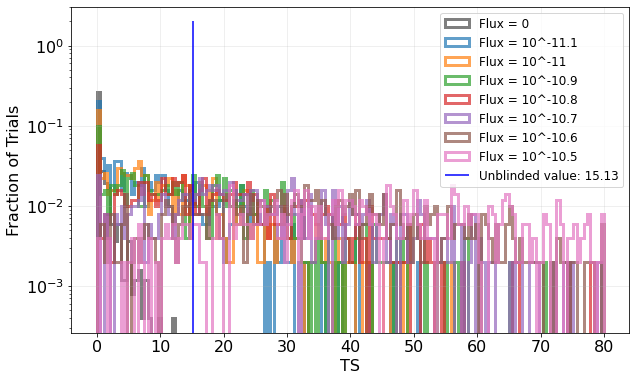

In [ ]:
#Plot the signal and background TS
fig, ax = plt.subplots(figsize=(10,6))
bins = np.linspace(0, 80, 150)

ax.hist(ts_bg,
        bins = bins,
        weights = np.ones_like(ts_bg)/len(ts_bg),
        histtype = 'step',
        color = 'k',
        linewidth = 3,
        alpha=0.5,
        label = r'Flux = 0',
       )

ax.hist(ts_111,
        bins = bins,
        weights = np.ones_like(ts_111)/len(ts_111),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-11.1')

ax.hist(ts_11,
        bins = bins,
        weights = np.ones_like(ts_11)/len(ts_11),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-11')

ax.hist(ts_109,
        bins = bins,
        weights = np.ones_like(ts_109)/len(ts_109),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.9')

ax.hist(ts_108,
        bins = bins,
        weights = np.ones_like(ts_108)/len(ts_108),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.8')

ax.hist(ts_107,
        bins = bins,
        weights = np.ones_like(ts_107)/len(ts_107),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.7')

ax.hist(ts_106,
        bins = bins,
        weights = np.ones_like(ts_106)/len(ts_106),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.6')

ax.hist(ts_105,
        bins = bins,
        weights = np.ones_like(ts_105)/len(ts_105),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.5')

ax.vlines(txs_ts, 0, 2.0, label = r'Unblinded value: {}'.format(round(txs_ts,2)),colors=['blue'])
ax.legend(loc='upper right', fontsize=12,)
plt.yscale('log')
ax.grid(alpha=0.25)
#ax.set_xlim(bins.min(), bins.max())
ax.set_xlabel("TS", fontsize=16)
ax.set_ylabel("Fraction of Trials", fontsize=16)
ax.tick_params(which='both', labelsize=16)

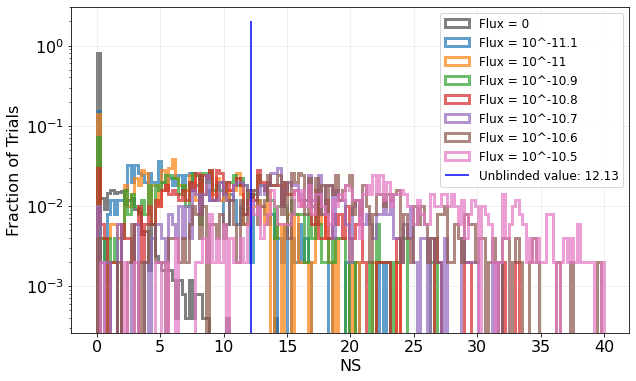

In [ ]:
# Plot the best fit ns
fig, ax = plt.subplots(figsize=(10,6))
bins = np.linspace(0, 40, 150)

ax.hist(ns_bg,
        bins = bins,
        weights = np.ones_like(ns_bg)/len(ns_bg),
        histtype = 'step',
        color = 'k',
        linewidth = 3,
        alpha=0.5,
        label = r'Flux = 0',
       )

ax.hist(ns_111,
        bins = bins,
        weights = np.ones_like(ns_111)/len(ns_111),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-11.1')

ax.hist(ns_11,
        bins = bins,
        weights = np.ones_like(ns_11)/len(ns_11),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-11')

ax.hist(ns_109,
        bins = bins,
        weights = np.ones_like(ns_109)/len(ns_109),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.9')

ax.hist(ns_108,
        bins = bins,
        weights = np.ones_like(ns_108)/len(ns_108),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.8')

ax.hist(ns_107,
        bins = bins,
        weights = np.ones_like(ns_107)/len(ns_107),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.7')

ax.hist(ns_106,
        bins = bins,
        weights = np.ones_like(ns_106)/len(ns_106),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.6')

ax.hist(ns_105,
        bins = bins,
        weights = np.ones_like(ns_105)/len(ns_105),
        histtype = 'step',
        linewidth = 3,
        alpha = 0.7,
        label = r'Flux = 10^-10.5')

ax.vlines(txs_ns, 0, 2.0, label = r'Unblinded value: {}'.format(round(txs_ns,2)),colors=['blue'])
ax.legend(loc='upper right', fontsize=12,)
plt.yscale('log')
ax.grid(alpha=0.25)
#ax.set_xlim(bins.min(), bins.max())
ax.set_xlabel("NS", fontsize=16)
ax.set_ylabel("Fraction of Trials", fontsize=16)
ax.tick_params(which='both', labelsize=16)

In [ ]:
# Use this bit of code to save the numpy arrays outputted from trial runs as a '.npy' file
# You will have to import 'os' and both the 'save' and 'load' libraries from the numpy library either
# at the top with the others or here before you run the code to have both save and load functionality.
# You can copy and paste from below or just uncomment:

import os
from numpy import save
from numpy import load

# Use the 'save()' funciton to save. The first argument is the filename and second is the numpy array
# you wish to save. 'SAVEPATH' defines the path to save the file, 'RUNFOLDER' should be a unique name
# to identify the run, and 'FILENAME' is the name of the particular file.
# I've been using the following convention for naming files:

# XXX##_*** , where:
    # XXX is:
        # BGD for background
        # INJ for trials with n injections
        # FLX for trials with flux norms
    # ## is:
        # 00 for BGD
        # the number of injections for INJ; e.g. n_inj=10 --> ## = 10
        # the negative exponent of the flux norm for FLX, where the first two numbers are before the decimal and the rest is after
            # e.g. flux_norm = 1e-11 --> ## = 11
            # e.g. flux_norm = 1e-10.125 --> ## = 10125
    # *** is the number of trials in that run

# Make a new folder for each run and name it in a way we can identify it.
# 'TARGETARRAY' is the unzipped numpy array you want to save. Just copy and paste the array you want to save.
# Repeat this code with the same runfolder for each array of the run.

SAVEPATH = './TrialData/'
RUNFOLDER = 'RUN3/'
FILENAME = 'FLX105_1000test'
TARGETARRAY = best_fit_arr_105

#This just creates the runfolder if it doesn't already exist
if not os.path.exists(SAVEPATH+RUNFOLDER):
    os.makedirs(SAVEPATH+RUNFOLDER)

save(SAVEPATH+RUNFOLDER+FILENAME, TARGETARRAY)

In [ ]:
#finding 10% and mean 
ten_ts_111 = np.percentile(ts_111,10)
mean_ts_111 = np.mean(ts_111)

ten_ts_11 = np.percentile(ts_11,10)
mean_ts_11 = np.mean(ts_11)

ten_ts_109 = np.percentile(ts_109,10)
mean_ts_109 = np.mean(ts_109)

ten_ts_108 = np.percentile(ts_108,10)
mean_ts_108 = np.mean(ts_108)

ten_ts_107 = np.percentile(ts_107,10)
mean_ts_107 = np.mean(ts_107)

ten_ts_106 = np.percentile(ts_106,10)
mean_ts_106 = np.mean(ts_106)

ten_ts_105 = np.percentile(ts_105,10)
mean_ts_105 = np.mean(ts_105)

#finding 3 sigma and mean of bg
mean_ts_bg = np.mean(ts_bg) 
threesig_ts_bg = np.percentile(ts_bg,99.85)

# Print the results
print('The mean and 3 sigma of the background TS: ')
print(mean_ts_bg, threesig_ts_bg)

print('\n')
print('The mean and 10% value of flux 10^-11.1: ')
print(mean_ts_111,ten_ts_111)

print('\n')
print('The mean and 10% value of flux 10^-11: ')
print(mean_ts_11,ten_ts_11)

print('\n')
print('The mean and 10% value of flux 10^-10.9: ')
print(mean_ts_109,ten_ts_109)

print('\n')
print('The mean and 10% value of flux 10^-10.8: ')
print(mean_ts_108,ten_ts_108)

print('\n')
print('The mean and 10% value of flux 10^-10.7: ')
print(mean_ts_107,ten_ts_107)

print('\n')
print('The mean and 10% value of flux 10^-10.6: ')
print(mean_ts_106,ten_ts_106)

print('\n')
print('The mean and 10% value of flux 10^-10.5: ')
print(mean_ts_105,ten_ts_105)

print('\n')
print('For sensitivity level, the 10th percentile of a certain flux level will be the mean of the background data. ')
#rint('For a 3 sigma discovery level, the mean of a certain flux level will be the 99.85% of the background data')
print('For discovery level, the 10th percentile of a certain flux will be at the 99.85th percentile of the background data')

#print('\n\n\nThe mean, 50th, and 10th percentile of the ' + TRIALNAME + ' trial set TS and NS: \n TS')
#print(mean_ts_trial, fifty_ts_trial, ten_ts_trial)
#print('\n NS')
#print(mean_ns_trial, fifty_ns_trial, ten_ns_trial)

The mean and 3 sigma of the background TS: 
0.2163836514446216 7.7671123102967625


The mean and 10% value of flux 10^-11.1: 
8.988180766837662 0.0


The mean and 10% value of flux 10^-11: 
10.912094425567865 0.0


The mean and 10% value of flux 10^-10.9: 
15.868860688760309 0.5252069601323202


The mean and 10% value of flux 10^-10.8: 
20.20355408000846 3.4342734271759467


The mean and 10% value of flux 10^-10.7: 
27.022213132296827 6.7358898820948


The mean and 10% value of flux 10^-10.6: 
36.71377632406712 11.456972906709659


The mean and 10% value of flux 10^-10.5: 
50.70708595878476 19.669566041975365


For sensitivity level, the 10th percentile of a certain flux level will be the mean of the background data. 
For discovery level, the 10th percentile of a certain flux will be at the 99.85th percentile of the background data


In [ ]:
#SENSITIVITY VALUE:
#mean background = .24, so 10th percentile of a flux level should = .24
#sensitivity flux value is in between 10^-11 and 10^-10.9

#DISCOVERY VALUE:
#3 sigma of the background = 8.1, so 10th percentile of a flux level should = 8.1
#discovery flux value should be between 10^-10.7 and 10^-10.6


#Using linear interpolation to find the flux values for the discovery and sensitivity levels
sen_flux = -11+((mean_ts_bg-ten_ts_11)*(-10.9-(-11))/(ten_ts_109-ten_ts_11))
print('The flux norm for sensitivity: ')
print(sen_flux)

disc_flux = -10.7+((threesig_ts_bg-ten_ts_107)*(-10.6-(-10.7))/(ten_ts_106-ten_ts_107))
print('\n')
print('The flux norm for discovery: ')
print(disc_flux)

The flux norm for sensitivity: 
-10.958800307712963


The flux norm for discovery: 
-10.6781570791527
